## Visualising metrics

In [8]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sb

In [2]:
!pwd

/wdir/tfm/cris_test


In [ ]:
path_to_file = './results/sena_norman_1_double_metrics.csv'
df = pd.read_csv(path_to_file)

In [17]:
df.iloc[:, 1:].mean(axis=0)

mmd_true_vs_ctrl    0.201363
mmd_true_vs_pred    1.154995
mse_true_vs_ctrl    0.080576
mse_true_vs_pred    0.172373
kld_true_vs_ctrl    0.007321
kld_true_vs_pred    0.155714
dtype: float64

In [75]:
df

,double,mmd_true_vs_ctrl,mmd_true_vs_pred,mse_true_vs_ctrl,mse_true_vs_pred,kld_true_vs_ctrl,kld_true_vs_pred
0,AHR+FEV,0.101555,1.427069,0.075449,0.184683,0.003209,0.197176
1,AHR+KLF1,0.163904,0.974736,0.083472,0.168017,0.005238,0.126148
2,BAK1+BCL2L11,0.155179,0.709171,0.076095,0.138176,0.004691,0.059115
3,BAK1+KLF1,0.272017,0.730316,0.081424,0.140850,0.012928,0.062925
4,BAK1+TMSB4X,0.094348,0.730903,0.079186,0.147247,0.002892,0.071244
...,...,...,...,...,...,...,...
126,SNAI1+UBASH3B,0.124801,0.988197,0.081481,0.165803,0.004129,0.123858
127,SNAI1+ZBTB10,0.227714,1.793176,0.073301,0.198469,0.009220,0.269565
128,TBX2+TBX3,0.122947,1.054041,0.078340,0.167026,0.003947,0.133229
129,UBASH3A+UBASH3B,0.170676,0.731447,0.086566,0.156165,0.007307,0.080214


<AxesSubplot:xlabel='variable', ylabel='value'>

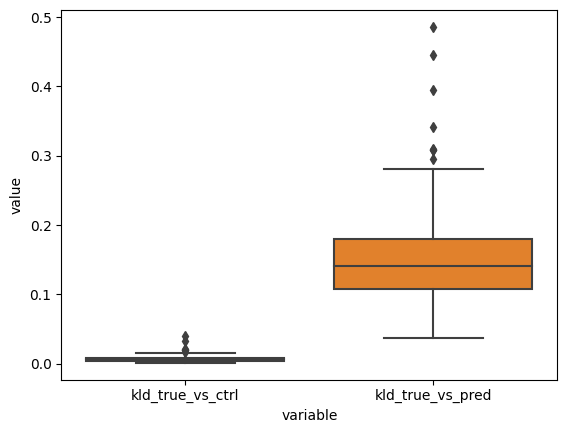

In [27]:
sb.boxplot(data = df.iloc[:, 5:7].melt(), x="variable", y="value") 

In [28]:
path_gears_og = "./results/gears_norman_split_simulation_seed_7_hidden_size_64_double_metrics.csv"
path_gears_change = "./results/gears_norman_split_simulation_seed_7_hidden_size_64_double_change_metrics.csv"
path_sena_1 = './results/sena_norman_1_double_metrics.csv'
df_gears_og = pd.read_csv(path_gears_og)
df_gears_change = pd.read_csv(path_gears_change)
df_sena_1 = pd.read_csv(path_sena_1)

In [32]:
df_gears_og['Group'] = 'GEARS OG'
df_gears_change['Group'] = 'GEARS change'
df_sena_1['Group'] = 'SENA'

In [42]:
df_gears_og.iloc[:, [1, 2, 7]]

,mmd_true_vs_ctrl,mmd_true_vs_pred,Group
0,0.301072,6.048503,GEARS OG
1,0.322025,6.059979,GEARS OG
2,0.237478,5.709274,GEARS OG
3,0.362707,5.584922,GEARS OG
4,0.554805,6.382120,GEARS OG
...,...,...,...
123,0.217237,5.875245,GEARS OG
124,0.465777,6.051925,GEARS OG
125,0.292525,5.497470,GEARS OG
126,0.415082,6.294958,GEARS OG


In [46]:
df_mmd = pd.concat([df_gears_og.iloc[:, [1, 2, 7]], df_gears_change.iloc[:, [1, 2, 7]], df_sena_1.iloc[:, [1, 2, 7]]], ignore_index=True)
df_mse = pd.concat([df_gears_og.iloc[:, [3, 4, 7]], df_gears_change.iloc[:, [3, 4, 7]], df_sena_1.iloc[:, [3, 4, 7]]], ignore_index=True)
df_kld = pd.concat([df_gears_og.iloc[:, [5, 6, 7]], df_gears_change.iloc[:, [5, 6, 7]], df_sena_1.iloc[:, [5, 6, 7]]], ignore_index=True)

In [47]:
df_mmd

,mmd_true_vs_ctrl,mmd_true_vs_pred,Group
0,0.301072,6.048503,GEARS OG
1,0.322025,6.059979,GEARS OG
2,0.237478,5.709274,GEARS OG
3,0.362707,5.584922,GEARS OG
4,0.554805,6.382120,GEARS OG
...,...,...,...
382,0.124801,0.988197,SENA
383,0.227714,1.793176,SENA
384,0.122947,1.054041,SENA
385,0.170676,0.731447,SENA


[Text(0.5, 0, 'MMD for double prediction'), Text(0, 0.5, 'Value')]

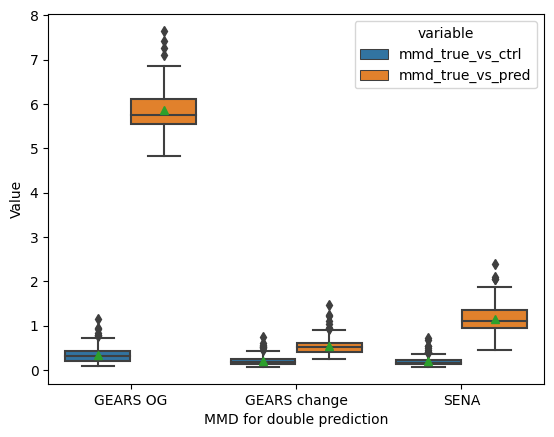

In [59]:
df_melted = df_mmd.melt(id_vars='Group', value_vars=['mmd_true_vs_ctrl', 'mmd_true_vs_pred'], var_name='variable', value_name='value')
ax = sb.boxplot(data=df_melted, x='Group', y='value', hue='variable', showmeans=True)
ax.set(xlabel="MMD for double prediction", ylabel="Value")

[Text(0.5, 0, 'MSE for double prediction'), Text(0, 0.5, 'Value')]

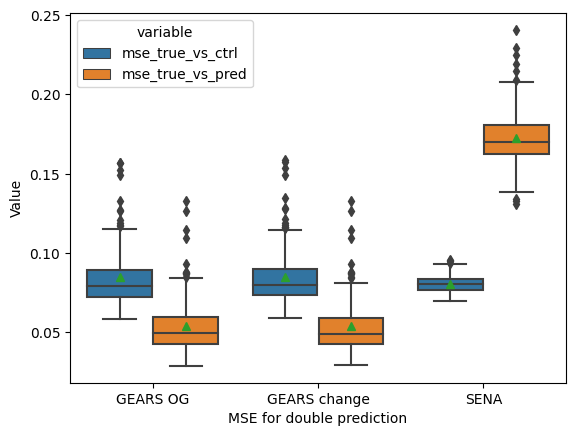

In [57]:
df_melted = df_mse.melt(id_vars='Group', value_vars=['mse_true_vs_ctrl', 'mse_true_vs_pred'], var_name='variable', value_name='value')
ax = sb.boxplot(data=df_melted, x='Group', y='value', hue='variable', showmeans=True)
ax.set(xlabel="MSE for double prediction", ylabel="Value")

[Text(0.5, 0, 'KLD for double prediction'), Text(0, 0.5, 'Value')]

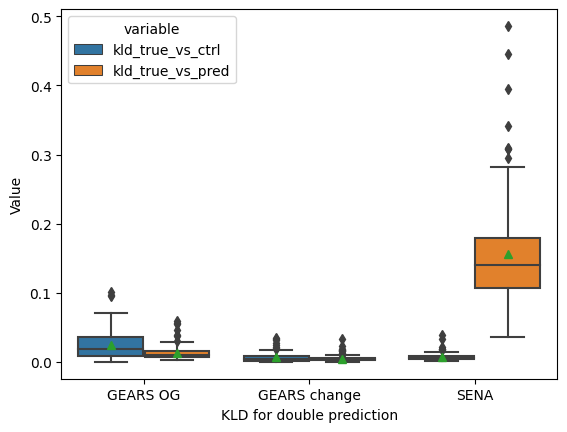

In [55]:
df_melted = df_kld.melt(id_vars='Group', value_vars=['kld_true_vs_ctrl', 'kld_true_vs_pred'], var_name='variable', value_name='value')
ax = sb.boxplot(data=df_melted, x='Group', y='value', hue='variable', showmeans=True)
ax.set(xlabel="KLD for double prediction", ylabel="Value")

## SENA metrics from inference code

In [62]:
path_sena = "./models/sena_norman_1/sena_norman_1_metrics_summary.tsv"
df_inf = pd.read_csv(path_sena, delimiter="\t")

In [74]:
df_double = df_inf[df_inf["mode"] == "double"]
df_double[:2]

,Metric,Values,mode,seed,latdim,model_name
8,MMD,1.031641,double,42,105,sena_norman_1
9,MSE,0.026592,double,42,105,sena_norman_1


In [ ]:
df_metrics_comparison = pd.DataFrame()

In [82]:
df_sample = df_double[:2].iloc[:, [0, 1]]
df_sample["Values"] = [df.iloc[:, 1:].mean(axis=0)[1], df.iloc[:, 1:].mean(axis=0)[3]]
df_sample

,Metric,Values
8,MMD,1.154995
9,MSE,0.172373


In [81]:
df.iloc[:, 1:].mean(axis=0)[1]

1.154994859970846